# Musical Attribute Analysis -  Data Analysis & Visualization 

I will be focusing this analysis to answer the following question: **"What makes up my musical taste?"**

We ended the previous [notebook](https://github.com/sreegp/Musical-Attribute-Analysis/blob/master/Musical%20Attribute%20Analysis%20-%20Data%20Collection%20%26%20Preprocessing.ipynb) with data collection and preprocessing. The dataset I will be using consists of 821 songs that I listen to. Note that I started my analysis with all ~4000 iTunes songs I have listened to. I had to narrow down my analysis to 821 songs as I could not find the other songs on Spotify. One explanation for this could be that I listen to songs in English, Hindi (indian language) and Tamil (another indian language). I am guessing non-English songs are not as common on Spotify.

The dataset of 821 songs consists of the following features. Many feature definitions have been extracted from Spotify.com. Note that some features in the dataset such as 'key' are not within the scope of this analysis.

- **Play Count:** Number of times a song was played

- **Acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- **Danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- **Energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

- **Instrumentalness:** Predicts whether a track contains no vocals. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- **Liveness:** Detects the presence of an audience in the recording. A value above 0.8 provides strong likelihood that the track is live.

- **Loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Values typical range between -60 and 0 db.

- **Speechiness:** Speechiness detects the presence of spoken words in a track.

- **Valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- **Popularity:** Popularity of the song as defined by Spotify's algorithms which take into account factors like play count over a timeframe (between 0-100)

In [35]:
%matplotlib inline
import pandas as pd 
import numpy as np
from pprint import pprint
import json
import math
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import statistics
import csv
import seaborn as sns

In [2]:
music_data = json.load(open('final_data.json'))
music_data = pd.DataFrame(music_data)

### Sample Song, with Audio Features

In [3]:
music_data.iloc[0] # sample data

acousticness                                                     0.46
album                           Coke Studio India Season 3: Episode 1
album_uri                        spotify:album:2CStgaiOhe1w4OXAoqP1gl
analysis_url        https://api.spotify.com/v1/audio-analysis/0Pua...
artist                                                    A.R. Rahman
artist_uri                      spotify:artist:1mYsTxnqsietFxj1OgoGbG
danceability                                                    0.318
duration_ms                                                    325787
energy                                                          0.508
id                                             0PuaYHseEiuGj3syu49k6G
instrumentalness                                             0.000121
key                                                                 1
liveness                                                        0.106
loudness                                                       -6.067
mode                

## Averages

Let us start off the analysis by calculating average values for features of the songs I listen to. This gives an overview of my musical tastes. Note that average play_count is not calculated. Play_count is instead used to calculate weighted average values of features later on in the analysis.

Looking at the average values of the features, we can observe that I enjoy music with high levels of loudness (-10.6), moderate levels of acousticness (0.46), danceability (0.53) and energy (0.49), slightly lower than moderate levels of popularity (34.8) and valence (0.4) and low levels of instrumentalness (0.22), liveness (0.12) and speechiness (0.07). Note that all features are measured on a scale between 0 and 1, expect for popularity which is measured on a scale between 0 and 100 and loudness which is measured on a scale from -60db to 0 db.

The average values tell me that I like music that is loud, is recorded and not live, consists of few instrumental tracks, contains a minimal number of speech-like sounds, consists of both negative and positive sounds (valence), but a litte more of negative songs and is moderately danceable, energetic and acoustic in nature. It also seems that popularity does not have a huge influence on my musical taste.

In [53]:
avg_acousticness = np.average(music_data['acousticness'])
print("avg_acousticness: " + str(avg_acousticness))

avg_danceability  = np.average(music_data['danceability'])
print("avg_danceability: " + str(avg_danceability))

avg_energy   = np.average(music_data['energy'])
print( "avg_energy: " + str(avg_energy))

avg_instrumentalness   = np.average(music_data['instrumentalness'])
print( "avg_instrumentalness: " + str(avg_instrumentalness))

avg_liveness = np.average(music_data['liveness'])
print( "avg_liveness: " + str (avg_liveness))

avg_loudness = np.average(music_data['loudness'])
print( "avg_loudness: " + str(avg_loudness))

avg_popularity  = np.average(music_data['popularity'])
print( "avg_popularity:" + str(avg_popularity))

avg_speechiness  = np.average(music_data['speechiness'])
print( "avg_speechiness:" + str(avg_speechiness))

avg_valence  = np.average(music_data['valence'])
print( "avg_valence: " + str(avg_valence))


avg_acousticness: 0.460103940804
avg_danceability: 0.529243483557
avg_energy: 0.49125952497
avg_instrumentalness: 0.217682307393
avg_liveness: 0.162953349574
avg_loudness: -10.5854872107
avg_popularity:34.8428745432
avg_speechiness:0.0681495736906
avg_valence: 0.404420584653


## Weighted Averages

While average values of the features of the songs I like provide general information about my musical taste, it is more useful to consider the weighted average of the features, given that I listen to some songs many more times than others. For example, I listened to 'Make You Feel My Love' by Adele 69 times while I listened to 'Under My Skin' by Avril Lavigne twice. If I were to calculate the average value of a feature, for example acousticness, giving equal weight to both 'Make You Feel My Love'(0.91 acousticness) and 'Under My Skin' (0.0005 acousticness), the analysis could likely end up showing that I enjoy music with lower values of acousticness than what I actually do.

Hence, a better analysis would need to take the play_count into consideration. We can come up with a weighted average for each of the features by multiplying the value of the feature for each song with the song's play count, then adding up these values for the feature across each song and dividing the total amount by total play count. This way we can better understand what levels of each feature I enjoy. 

Based on the weighted average of the features, we can observe that I enjoy music high levels of loudness (-9.6), with moderate levels of acousticness (0.47), danceability (0.55) and energy (0.49), slightly lower than moderate levels of popularity (40.5) and valence (0.38) and low levels of instrumentalness (0.16), liveness (0.15) and speechiness (0.07). Note that all features are measured on a scale between 0 and 1, expect for popularity which is measured on a scale between 0 and 100 and loudness which is measured on a scale from -60db to 0 db.

This could indicate that I like music that is loud, is recorded and not live, consists of few instrumental tracks, contains a minimal number of speech-like sounds, consists of both negative and positive sounds (valence), but a litte more of negative songs and is moderately danceable, energetic and acoustic in nature. It also seems that popularity does not have a huge influence on my musical taste.

Let's compare the weighted average of the features to their respective average values. The difference between the weighted average value (40.5) and average value (34.8) for popularity indicates that I listen to more popular music that originally thought, although the popularity of music I like does not exceed a moderate level. The difference between the weighted average value (0.16) and average value (0.22) for instrumentalness indicates that my liking for instrumental tracks is lower than originally thought. The difference between the average and weighted average values for loudness, acousticness, danceability, energy, valence, liveness and speechiness are negligible. 

This analysis tells me that for majority of the features, the weighted averages are very close to their respective average values. This means that, regardless of play_count, the songs I listen to are fairly similar. 

Given that my musical taste does not vary significantly with play_count, I decided not to cluster the songs into groups for further analysis. I felt that looking into the dispersion of data for each feature might be more meaningful.

In [5]:
music_data['weighted_acousticness'] = music_data['acousticness']*music_data['play_count']/np.sum(music_data['play_count'])
print( "weighted_acousticness:" + str(np.sum(music_data['weighted_acousticness'])))

music_data['weighted_danceability'] = music_data['danceability']*music_data['play_count']/np.sum(music_data['play_count'])
print( "weighted_danceability:" + str(np.sum(music_data['weighted_danceability'])))

music_data['weighted_energy'] = music_data['energy']*music_data['play_count']/np.sum(music_data['play_count'])
print( "weighted_energy:" + str(np.sum(music_data['weighted_energy'])))

music_data['weighted_instrumentalness'] = music_data['instrumentalness']*music_data['play_count']/np.sum(music_data['play_count'])
print( "weighted_instrumentalness:" + str(np.sum(music_data['weighted_instrumentalness'])))

music_data['weighted_liveness'] = music_data['liveness']*music_data['play_count']/np.sum(music_data['play_count'])
print( "weighted_liveness:" + str(np.sum(music_data['weighted_liveness'])))

music_data['weighted_loudness'] = music_data['loudness']*music_data['play_count']/np.sum(music_data['play_count'])
print( "weighted_loudness:" + str(np.sum(music_data['weighted_loudness'])))

music_data['weighted_popularity'] = music_data['popularity']*music_data['play_count']/np.sum(music_data['play_count'])
print( "weighted_popularity:" + str(np.sum(music_data['weighted_popularity'])))

music_data['weighted_speechiness'] = music_data['speechiness']*music_data['play_count']/np.sum(music_data['play_count'])
print( "weighted_speechiness:" + str(np.sum(music_data['weighted_speechiness'])))

music_data['weighted_valence'] = music_data['valence']*music_data['play_count']/np.sum(music_data['play_count'])
print( "weighted_valence:" + str(np.sum(music_data['weighted_valence'])))


weighted_acousticness:0.471437827321
weighted_danceability:0.547170156668
weighted_energy:0.492434431601
weighted_instrumentalness:0.15793920402
weighted_liveness:0.154362504776
weighted_loudness:-9.57520137562
weighted_popularity:40.4632212457
weighted_speechiness:0.0712334925487
weighted_valence:0.380050888422


## Dispersion

The next part of the analysis looks into the dispersion of data for each feature. This gives more visibility into the levels of each feature I might actually enjoy. For example, the weighted average value/average value for a feature might indicate that I enjoy music that contains the feature at a moderate level. However, looking at the dispersion of the data, I might learn that I enjoy listening to music that contains both the very high levels and the very low levels of the particular feature.

I plotted the values each feature has for all the songs in the dataset. For ease of comparison and visualization, loudness (-60db to 0db) and popularity (0 to 100) values were normalized to a scale between 0 and 1, similar to the other features. I made the following observations regarding dispersion and weighted average for each feature.

- **Acousticness:** The weighted average of 0.47 suggests that I enjoy music that has a moderate level of acousticness. However, looking at the dispersion of acousticness values, it seems that I particularly enjoy music that contains very low (0 to 0.2) and very high (0.8 to 1) levels of acousticness.


- **Danceability:** The weighted average of 0.55 suggests that I enjoy music that has a moderate level of danceability. Looking at the dispersion of danceability values, most of the songs I enjoy do not fall into very low ( 0 to 0.2) and very high (0.8 to 1) levels of danceability. It seems that a large proportion of the songs lie between danceability values of 0.3 to 0.7, which support the claim that I enjoy music that contains a moderate level of danceability. It is interesting that in the interval between 0.4 and 0.5, there is one small region with a significant dip in the number of songs. We cannot draw observations about my musical test based on this region. I believe that working with a larger data set might reduce the occurance of such dips.


- **Energy:** The weighted average of 0.49 suggests that I enjoy music that has a moderate level of energy. However, the dispersion of energy values seems to suggest that I almost equally enjoy songs with varying levels of energy.


- **Instrumentalness:** The weighted average of 0.16 suggests that I enjoy music that has a low level of instrumentalness. The dispersion of instrumentalness values however suggests that I enjoy music with very low (0 to 0.2) and very high (0.8 to 1) levels of instrumentalness.


- **Liveness:** The weighted average of 0.15 suggests that I enjoy music that has a low level of liveness. This is supported by the dispersion of liveness values as a large proportion of them fall within the interval between 0 to 0.2. At the same time, it is good to note that I probably occasionally enjoy music with a slightly higher level (0.2 to 0.4) of liveness.


- **Loudness:** The weighted average of -9.6 suggests that I enjoy music that has a high level of loudness. This is supported by the dispersion of loudness values as a large proportion of the values lie in the interval between 0.8 and 1 and the rest of the values lie mostly between 0.6 to 0.8.


- **Speechiness:** The weighted average of 0.07 suggests that I enjoy music that has a very low level of speechiness. In other words, I don't really enjoy music that has speech-like sounds or spoken words. The dispersion of speechiness values support the claim as most of the values fall in the interval between 0 and 0.2.


- **Valence:** The weighted average of 0.38 suggests that I appreciate music that has lower than moderate level of valence. In other words, I appreciate songs that contain more negative sounds than positive sounds. The dispersion of valence data throughout the range between 0 to 1 clarifies that it is not that I simply like negative sounding music more than positive sounding music, but rather that I have a liking for music throughout the range from strongly negative to strongly positive, with an occasional preference for negative sounding music.


- **Popularity:** The weighted average of 40.5 suggests that I appreciate music that has lower than moderate level of popularity. This could mean that popularity does not greatly influence my musical tastest. In support of this, the dispersion of popularity values seems to suggest that I do not enjoy songs that are very popular (0.8 to 1) and that I have a leaning towards songs that are less popular (less than 0.5).



In [54]:
music_data_graph = pd.DataFrame(columns=['Feature', 'Value'])
music_data['normalized_loudness'] = (music_data['loudness']- (-60))/(60) #
music_data['normalized_popularity'] = (music_data['popularity'])/(100)


for i in range(len(music_data)):
    music_data_graph= music_data_graph.append({'Feature':'Acousticness', 'Value':music_data['acousticness'][i], 'Played': music_data['play_count'][i] }, ignore_index=True)
    music_data_graph= music_data_graph.append({'Feature':'Danceability', 'Value':music_data['danceability'][i], 'Played': music_data['play_count'][i] }, ignore_index=True)
    music_data_graph= music_data_graph.append({'Feature':'Energy', 'Value':music_data['energy'][i], 'Played': music_data['play_count'][i] }, ignore_index=True)
    music_data_graph= music_data_graph.append({'Feature':'Instrumentalness', 'Value':music_data['instrumentalness'][i], 'Played': music_data['play_count'][i] }, ignore_index=True)
    music_data_graph= music_data_graph.append({'Feature':'Liveness', 'Value':music_data['liveness'][i], 'Played': music_data['play_count'][i] }, ignore_index=True)
    music_data_graph= music_data_graph.append({'Feature':'Speechiness', 'Value':music_data['speechiness'][i], 'Played': music_data['play_count'][i] }, ignore_index=True)
    music_data_graph= music_data_graph.append({'Feature':'Valence', 'Value':music_data['valence'][i], 'Played': music_data['play_count'][i] }, ignore_index=True)
    music_data_graph= music_data_graph.append({'Feature':'Loudness', 'Value':music_data['normalized_loudness'][i], 'Played': music_data['play_count'][i] }, ignore_index=True)
    music_data_graph= music_data_graph.append({'Feature':'Popularity', 'Value':music_data['normalized_popularity'][i], 'Played': music_data['play_count'][i] }, ignore_index=True)


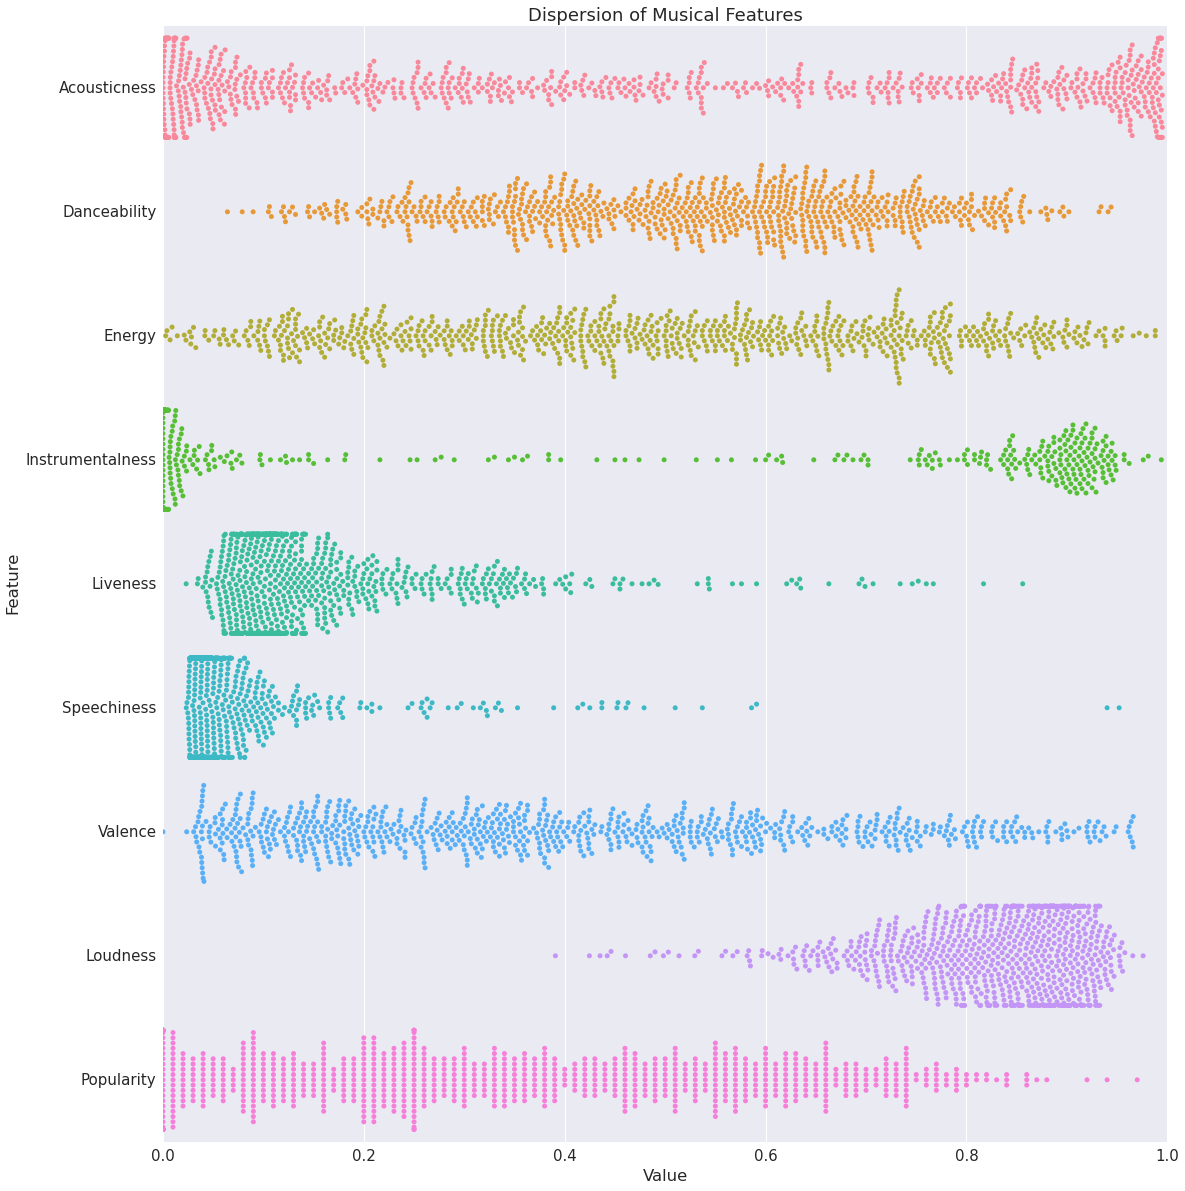

In [55]:
fig, ax = plt.subplots(figsize=(18, 20))
sns.swarmplot(x="Value", y="Feature", data=music_data_graph, ax = ax)
ax.set_title("Dispersion of Musical Features")
ax.set_xlim(0,1)
fig.savefig("output.png")

 ## Conclusion
 
 In conclusion, my musical taste is more complicated than I had thought. This seems to suggest that I listen to a wide variety of songs. Indeed, I listen to songs in three different langugages (English, Hindi, Tamil). I belive that it is important to expand one's musical appetite and I hope I expand my palate to enjoy a greater variety of songs and appreciate music in more languages. Having said that, I can draw the conclusion that musical taste consists of songs that are loud, recorded and not live and contain little speech.

## Further Analysis

This analysis opens up many opportunities for further analysis. I could perform a time-based analysis if I am able to obtain data on when I heard which songs. I could build on this analysis and create a song recommendation engine by looking at the data more closely. I could also obtain similar musical data for other individuals and perform musical taste analysis by demographics. 

Overall, I've enjoyed examining data to draw observations and learning more about my musical tastes. I am amazed by how much insight a small dataset such the one I've used can provide. I look forward to future analytics projects and pursuits.